<a href="https://colab.research.google.com/github/Arun2064/2024_stat_ml_assignments/blob/main/SML_Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
data = pd.read_csv('/content/breast_cancer_survival.csv')
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
data.replace('FEMALE',0, inplace=True)
data.replace('MALE',1, inplace=True)
data.replace('Positive',1, inplace=True)
data.replace('Negative',0, inplace=True)
data.replace('Dead',0, inplace=True)
data.replace('Alive',1, inplace=True)

<ipython-input-4-709dcaf1cf2f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('MALE',1, inplace=True)
<ipython-input-4-709dcaf1cf2f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Positive',1, inplace=True)
<ipython-input-4-709dcaf1cf2f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [5]:
data.replace('II',2, inplace=True)
data.replace('III',3, inplace=True)
data.replace('I',1, inplace=True)

<ipython-input-5-fd5d96a82175>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('I',1, inplace=True)


In [6]:
data.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
data.replace('Mucinous Carcinoma',3, inplace=True)

<ipython-input-6-ecb44d251b39>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Mucinous Carcinoma',3, inplace=True)


In [7]:
data.replace('Other',0, inplace=True)
data.replace('Lumpectomy',1, inplace=True)
data.replace('Modified Radical Mastectomy',2, inplace=True)
data.replace('Simple Mastectomy',3, inplace=True)


<ipython-input-7-f9216a2b26c7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Simple Mastectomy',3, inplace=True)


In [8]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1,12-Dec-18,05-Jan-19,1.0


In [9]:
x=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']
y.isnull().sum()
y.fillna(0,inplace=True)

In [30]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

KNN

In [32]:
accuracy_list=[]
l=[]
for i in range(1,6):
  bkn=KNeighborsClassifier(n_neighbors=i)
  bkn.fit(x_train,y_train)
  accuracy_list.append([bkn.score(x_test,y_test)])
  l.append(i+1)

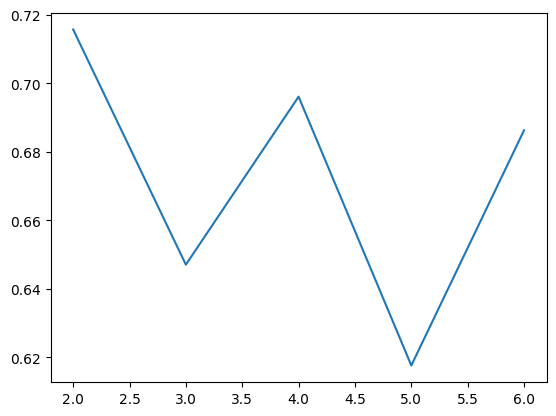

In [33]:
plt.plot(l,accuracy_list)

SVM

In [34]:
import torch
# Check for GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

Using device: cpu


In [35]:
svc=SVC()
# Initialize the model
#svc.to(device)
svc.fit(x_train,y_train)

SVC()

In [36]:
y_pred=svc.predict(x_test)
accuracy_svc=accuracy_score(y_test,y_pred)
print(accuracy_svc)

0.5098039215686274


In [37]:
c_report =classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

         0.0       0.51      0.69      0.58        51
         1.0       0.52      0.33      0.40        51

    accuracy                           0.51       102
   macro avg       0.51      0.51      0.49       102
weighted avg       0.51      0.51      0.49       102



In [38]:
c_m=confusion_matrix(y_test,y_pred)
print(c_m)

[[35 16]
 [34 17]]


Logistic Regression

In [39]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred=lg.predict(x_test)
accuracy_lg=accuracy_score(y_test,y_pred)

In [41]:
print(accuracy_lg)

0.6274509803921569


In [42]:
cl_report =classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63        51
         1.0       0.63      0.63      0.63        51

    accuracy                           0.63       102
   macro avg       0.63      0.63      0.63       102
weighted avg       0.63      0.63      0.63       102



In [43]:
cml=confusion_matrix(y_test,y_pred)
print(cml)

[[32 19]
 [19 32]]


PCA

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

KNN

In [45]:
accuracy_list=[]
l=[]
for i in range(1,6):
  bkn=KNeighborsClassifier(n_neighbors=i)
  bkn.fit(x_train_pca,y_train)
  accuracy_list.append([bkn.score(x_test_pca,y_test)])
  l.append(i+1)

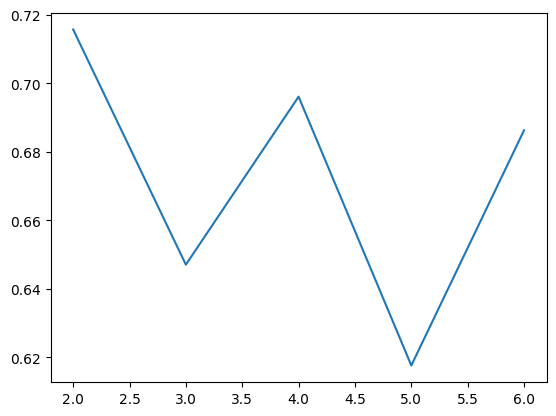

In [46]:
plt.plot(l,accuracy_list)

SVM

In [47]:
svc=SVC()
svc.fit(x_train_pca,y_train)

SVC()

In [48]:
y_pred=svc.predict(x_test_pca)
accuracy_svc=accuracy_score(y_test,y_pred)
print(accuracy_svc)

0.5392156862745098


In [49]:
c_report =classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

         0.0       0.55      0.43      0.48        51
         1.0       0.53      0.65      0.58        51

    accuracy                           0.54       102
   macro avg       0.54      0.54      0.53       102
weighted avg       0.54      0.54      0.53       102



In [50]:
c_m=confusion_matrix(y_test,y_pred)
print(c_m)

[[22 29]
 [18 33]]


Logistic Regression

In [51]:
lg=LogisticRegression()
lg.fit(x_train_pca,y_train)

LogisticRegression()

In [52]:
y_pred=lg.predict(x_test_pca)
accuracy_lg=accuracy_score(y_test,y_pred)
print(accuracy_lg)

0.6274509803921569


In [53]:
cl_report =classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63        51
         1.0       0.63      0.63      0.63        51

    accuracy                           0.63       102
   macro avg       0.63      0.63      0.63       102
weighted avg       0.63      0.63      0.63       102



In [54]:
cml=confusion_matrix(y_test,y_pred)
print(cml)

[[32 19]
 [19 32]]
